In [2]:

data<-read.csv("data_visco.csv")
data_lasso <- read.csv("data_lasso.csv")
data_AIC <- read.csv("data_AIC.csv")
dim(data_AIC)
dim(data_lasso)

[1] 7247   20

[1] 7247   29

In [3]:
# Charger la librairie
library("KrigInv") #Pour t-IMSE
library("nloptr") #Pour la fonction d'optimisation Cobyla


Warning message:
"le package 'KrigInv' a été compilé avec la version R 4.1.3"
Le chargement a nécessité le package : DiceKriging

Warning message:
"le package 'DiceKriging' a été compilé avec la version R 4.1.2"
Warning message:
"le package 'nloptr' a été compilé avec la version R 4.1.2"


In [4]:
#install.packages("MASS")
#install.packages("kernlab")
library("kernlab")
library("MASS")
library("nnet")
help(gausspr)

Warning message:
"le package 'kernlab' a été compilé avec la version R 4.1.3"
Warning message:
"le package 'MASS' a été compilé avec la version R 4.1.1"


In [5]:
set.seed(177) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(data) # nombre de lignes dans les données
nvar <- ncol(data) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 

In [6]:
# construction de l'échantillon d'apprentissage
datappr <- data[appri,]
# construction de l'échantillon test
datestr <- data[testi,]
# vérification
str(datappr)
str(datestr)
#summary(datappr) 

'data.frame':	5797 obs. of  116 variables:
 $ vis   : num  4433 25 17 21 64 ...
 $ X__2  : num  0 0.39 0 0 0 0 0 0 0 0 ...
 $ X__3  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X__4  : num  9.42 3.58 3.33 3.81 0 ...
 $ X__5  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X__6  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X__7  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X__8  : num  8.53 14.25 14.84 14.08 0 ...
 $ X__9  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X__10 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X__11 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X__12 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X__13 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X__16 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X__17 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X__18 : num  0 1.88 3.51 3.3 0 2 10.6 0 0.15 5.9 ...
 $ X__19 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X__20 : num  0 0.68 3.65 0.67 0 0 0 0 0 0 ...
 $ X__21 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X__22 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X__23 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X__24 : num  0 0.46 0 0 0 0 0 0 0 0 ...
 $ X__25 : num  0 0 0 0 0 0 0 0 0 0 ...
 $

In [7]:
gp=gausspr(log(vis)~.,data=datappr) 

Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."


Using automatic sigma estimation (sigest) for RBF or laplace kernel 


In [8]:
# Calcul des prévisions
pred.gausspr=predict(gp,newdata=datestr)
# Erreur quadratique moyenne de prévision
sum((pred.gausspr-log(datestr[,"vis"]))^2)/nrow(datestr)


# qd on garde vis on a l'erreur = 7.37460195902897e+23

[1] 0.9017632

Warning message:
"le package 'e1071' a été compilé avec la version R 4.1.1"



Parameter tuning of 'nnet':

- sampling method: 10-fold cross validation 

- best parameters:
 size decay
    1 1e-06

- best performance: 50.33517 


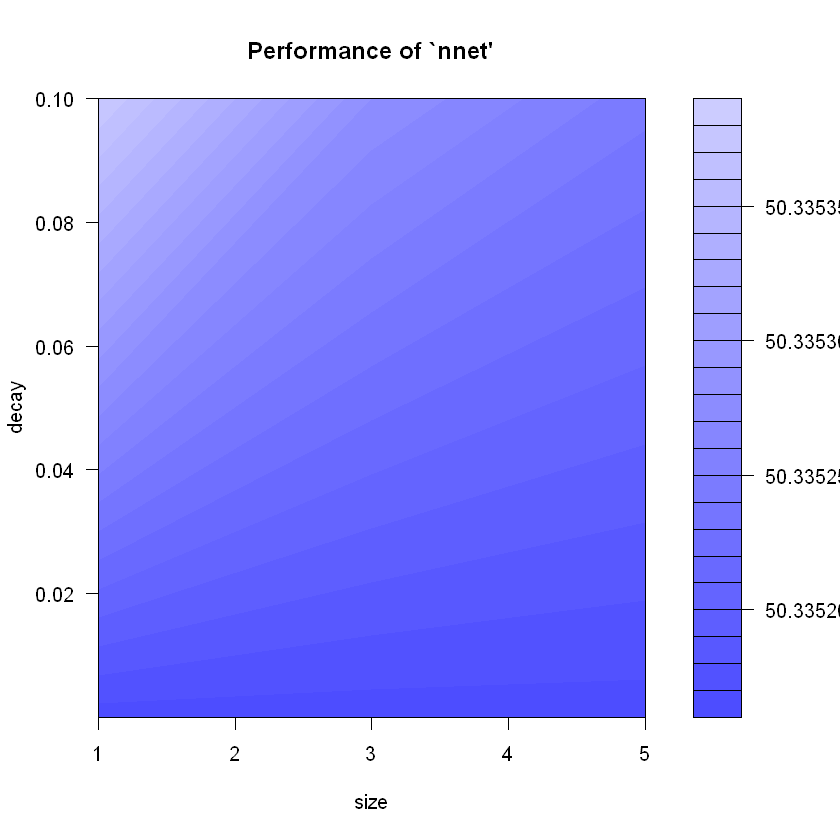

In [9]:
library("e1071")
tune.model.vis = tune.nnet(log(vis)~., data = datappr, size = c (1, 3, 5),decay = c (0.1, 0.001, 0.000001))
plot(tune.model.vis)
tune.model.vis

# weights:  118
initial  value 332658.681469 
final  value 292174.016296 
converged


Warning message in plot.window(...):
""titre" n'est pas un paramètre graphique"
Warning message in plot.xy(xy, type, ...):
""titre" n'est pas un paramètre graphique"
Warning message in axis(side = side, at = at, labels = labels, ...):
""titre" n'est pas un paramètre graphique"
Warning message in axis(side = side, at = at, labels = labels, ...):
""titre" n'est pas un paramètre graphique"
Warning message in box(...):
""titre" n'est pas un paramètre graphique"
Warning message in title(...):
""titre" n'est pas un paramètre graphique"


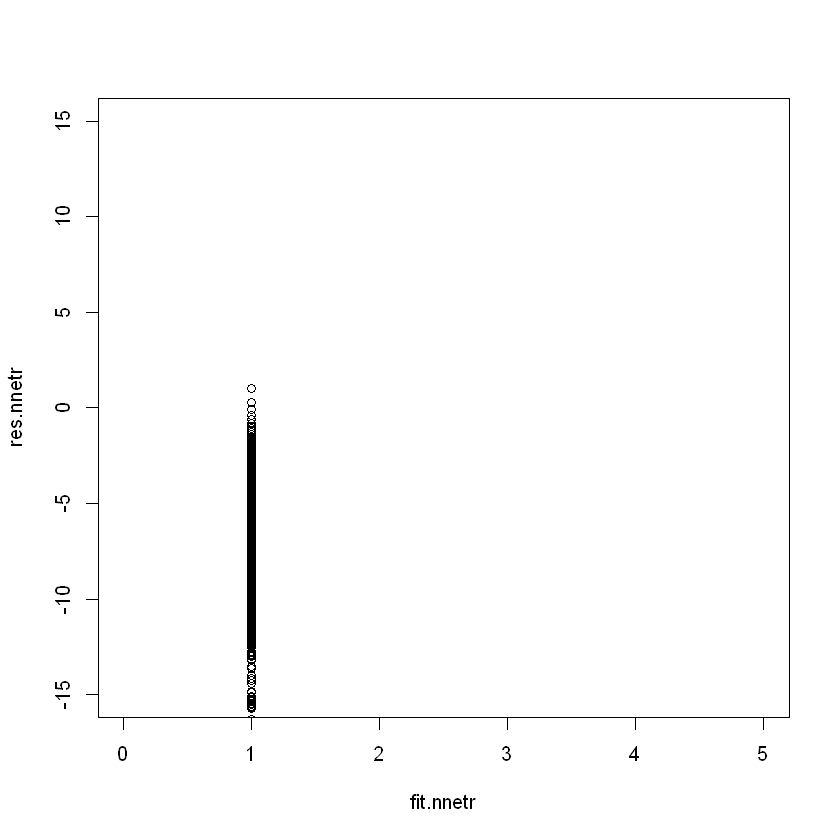

In [10]:
nnet.reg=nnet(log(vis)~.,data=datappr,size=1, decay=1e-6,maxit=500)
# calcul et graphe des résidus
fit.nnetr=predict(nnet.reg,data=datappr)
res.nnetr=fit.nnetr-log(datappr[,"vis"])
plot(fit.nnetr,res.nnetr,titre="",xlim=c(0,5),ylim=c(-15,15)) 

In [11]:
# Calcul des prévisions
pred.nnetr=predict(nnet.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision
sum((pred.nnetr-log(datestr[,"vis"]))^2)/nrow(datestr)

# qd on grade vis au lieu de log vis on a l'erreur 9.98444881698066e+22

[1] 48.68092

In [12]:
fjouet.test<-function(x1, x2){
    return((x1-0.5)**2+(x2-0.5)**2)
}

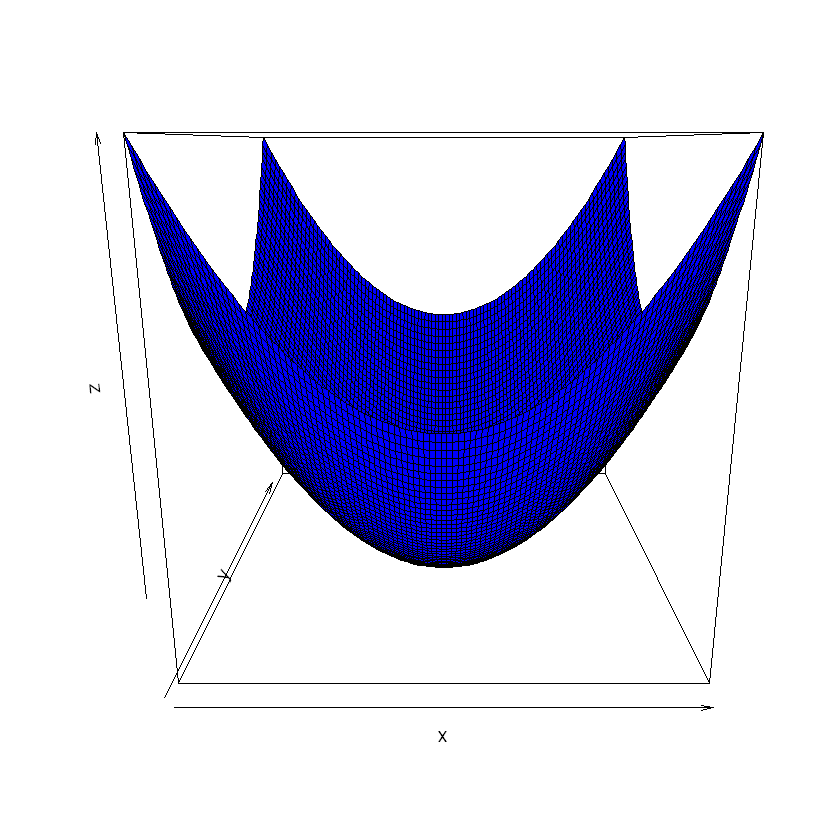

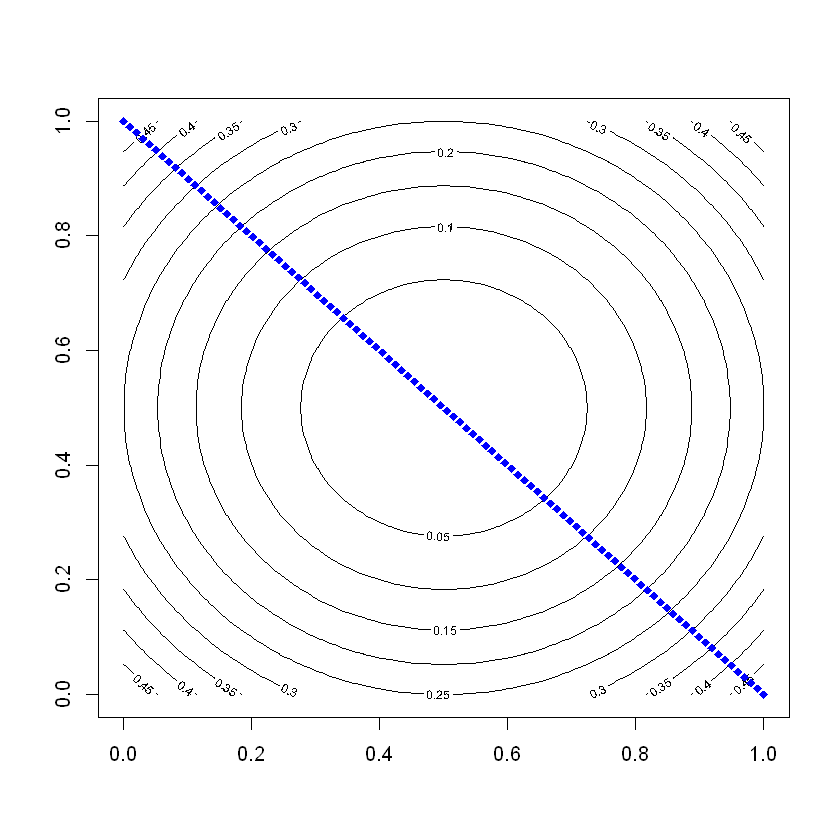

In [13]:
#x = c(0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9) 
#y=1-x

x <- seq(0,1,length.out=100)
y <- sort(1-x)
z <- outer((x-0.5)^2,(y-0.5)^2,`+`)

persp(x,y,z, col='blue')
contour(x,y,z)
lines(x, 1-x, pch=18, col="blue", type="b", lty=2)

In [14]:
x.donne <- seq(0,0.5,length.out=100)  #on ne prend des valeurs que entre 0 et 1/2 pour la fonctino jouet car 
#en deux dimensions entre 0 et 1/2 et entre 1/2 et 1 l'algo va apprendre deux fois la même chose avec x=1-y
y.donne <- 1-x

donne <- cbind(x.donne,y.donne)
resp<- fjouet.test(donne[,1], donne[,2])
mat.donne<-as.data.frame(cbind(resp, donne))

mat.donne

resp,x.donne,y.donne
<dbl>,<dbl>,<dbl>
0.5000000,0.000000000,1.0000000
0.4849760,0.005050505,0.9898990
0.4702071,0.010101010,0.9797980
0.4556933,0.015151515,0.9696970
0.4414345,0.020202020,0.9595960
0.4274309,0.025252525,0.9494949
0.4136823,0.030303030,0.9393939
0.4001888,0.035353535,0.9292929
0.3869503,0.040404040,0.9191919


In [15]:
set.seed(177) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(mat.donne) # nombre de lignes dans les données
nvar <- ncol(mat.donne) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 

In [16]:
# construction de l'échantillon d'apprentissage
mat.donne.appr <- mat.donne[appri,]
# construction de l'échantillon test
mat.donne.test <- mat.donne[testi,]
# vérification
str(mat.donne.appr)
str(mat.donne.test)
#summary(datappr) 

'data.frame':	80 obs. of  3 variables:
 $ resp   : num  0.5 0.485 0.456 0.441 0.427 ...
 $ x.donne: num  0 0.00505 0.01515 0.0202 0.02525 ...
 $ y.donne: num  1 0.99 0.97 0.96 0.949 ...
'data.frame':	20 obs. of  3 variables:
 $ resp   : num  0.1855 0.219 0.114 0.0941 0.0932 ...
 $ x.donne: num  0.465 0.116 0.187 0.394 0.207 ...
 $ y.donne: num  0.0707 0.7677 0.6263 0.2121 0.5859 ...


In [17]:
gp.test <- gausspr(mat.donne.appr[,1]~.,data=mat.donne.appr) 
#kernelf(gp.test)

Using automatic sigma estimation (sigest) for RBF or laplace kernel 


In [18]:
# Calcul des prévisions
pred.gausspr=predict(gp.test,newdata=mat.donne.test)
# Erreur quadratique moyenne de prévision
sum((pred.gausspr-mat.donne.test[,1])^2)/npop

[1] 2.876186e-05

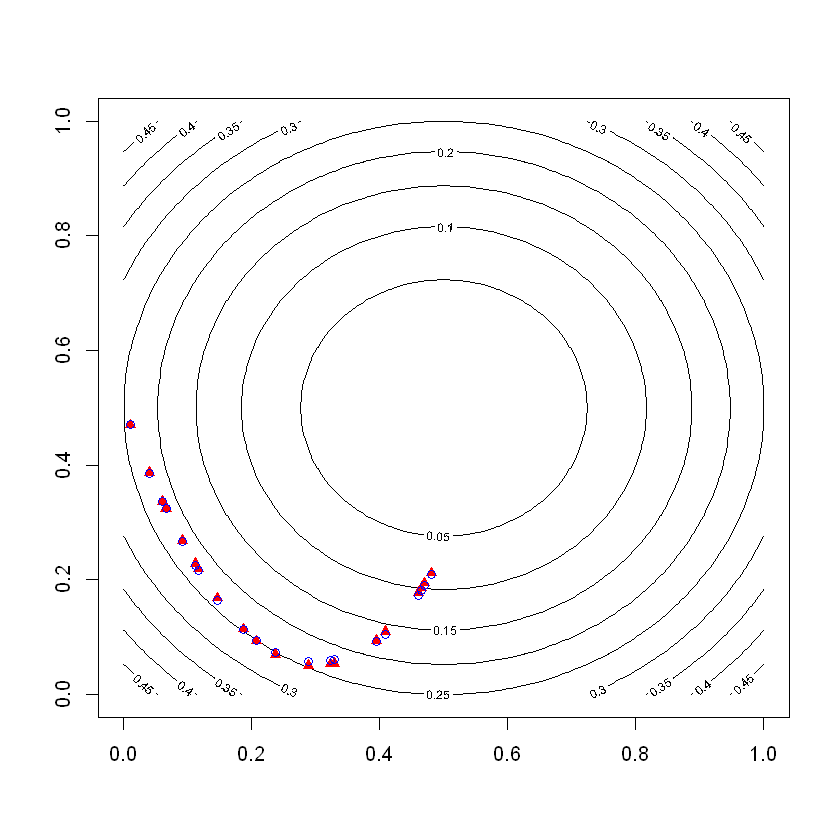

In [26]:
contour(x,sort(y),z)
points(mat.donne.test[,2], mat.donne.test[,1], col="red", pch = 17)  #points en rouges sont les vrais points pour la matrice de
#test que l'on est censé retrouver
points(mat.donne.test[,2],pred.gausspr, col="blue")  #points en bleus sont les points prédits avec les processus gaussien


In [19]:
gp.test1 <- gausspr(mat.donne.appr[,1]~.,data=mat.donne.appr,kernel="rbfdot") 
gp.test2 <- gausspr(mat.donne.appr[,1]~.,data=mat.donne.appr,kernel="polydot") 
gp.test3 <- gausspr(mat.donne.appr[,1]~.,data=mat.donne.appr,kernel="vanilladot") 
gp.test4 <- gausspr(mat.donne.appr[,1]~.,data=mat.donne.appr,kernel="tanhdot") 
gp.test5 <- gausspr(mat.donne.appr[,1]~.,data=mat.donne.appr,kernel="laplacedot") 
gp.test6 <- gausspr(mat.donne.appr[,1]~.,data=mat.donne.appr,kernel="anovadot") 
gp.test7 <- gausspr(mat.donne.appr[,1]~.,data=mat.donne.appr,kernel="splinedot") 

Using automatic sigma estimation (sigest) for RBF or laplace kernel 
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
 Setting default kernel parameters  
 Setting default kernel parameters  


In [20]:
pred.gausspr=predict(gp.test1,newdata=mat.donne.test)
# Erreur quadratique moyenne de prévision
sum((pred.gausspr-mat.donne.test[,1])^2)/npop
pred.gausspr=predict(gp.test2,newdata=mat.donne.test)
# Erreur quadratique moyenne de prévision
sum((pred.gausspr-mat.donne.test[,1])^2)/npop
pred.gausspr=predict(gp.test3,newdata=mat.donne.test)
# Erreur quadratique moyenne de prévision
sum((pred.gausspr-mat.donne.test[,1])^2)/npop
pred.gausspr=predict(gp.test4,newdata=mat.donne.test)
# Erreur quadratique moyenne de prévision
sum((pred.gausspr-mat.donne.test[,1])^2)/npop
pred.gausspr=predict(gp.test5,newdata=mat.donne.test)
# Erreur quadratique moyenne de prévision
sum((pred.gausspr-mat.donne.test[,1])^2)/npop
pred.gausspr=predict(gp.test6,newdata=mat.donne.test)
# Erreur quadratique moyenne de prévision
sum((pred.gausspr-mat.donne.test[,1])^2)/npop
pred.gausspr=predict(gp.test7,newdata=mat.donne.test)
# Erreur quadratique moyenne de prévision
sum((pred.gausspr-mat.donne.test[,1])^2)/npop

[1] 2.80791e-05

[1] 7.260947e-07

[1] 7.260947e-07

[1] 0.008241923

[1] 0.0001171536

[1] 6.338394e-06

[1] 2.841522e-06

In [21]:
error(gp.test1)
error(gp.test2)
error(gp.test3)
error(gp.test4)
error(gp.test5)
error(gp.test6)
error(gp.test7)

[1] 0.01546104

[1] 0.000241691

[1] 0.000241691

[1] 2.521228

[1] 0.03051849

[1] 0.004414348

[1] 0.001098245

In [27]:
gp.test.poly<- gausspr(mat.donne.appr[,1]~.,data=mat.donne.appr,kernel="polydot",cross=5)
# ici les parametres sont à 1 par defaut 
#If the offset in the Polynomial kernel is set to $0$, we obtain homogeneous polynomial kernels, for
#positive values, we have inhomogeneous kernels. Note that for negative values the kernel does not
#satisfy Mercer’s condition and thus the optimizers may fail

 Setting default kernel parameters  


In [23]:
#gp.poly.tune <- tune(gausspr,mat.donne.appr[,1]~.,data=mat.donne.appr)

Using automatic sigma estimation (sigest) for RBF or laplace kernel 


ERROR: Error in UseMethod("predict"): pas de méthode pour 'predict' applicable pour un objet de classe "c('gausspr', 'vm')"


In [30]:
# Calcul des prévisions
pred.gausspr.poly=predict(gp.test.poly,newdata=mat.donne.test)
# Erreur quadratique moyenne de prévision
sum((pred.gausspr.poly-mat.donne.test[,1])^2)/npop

[1] 7.260947e-07

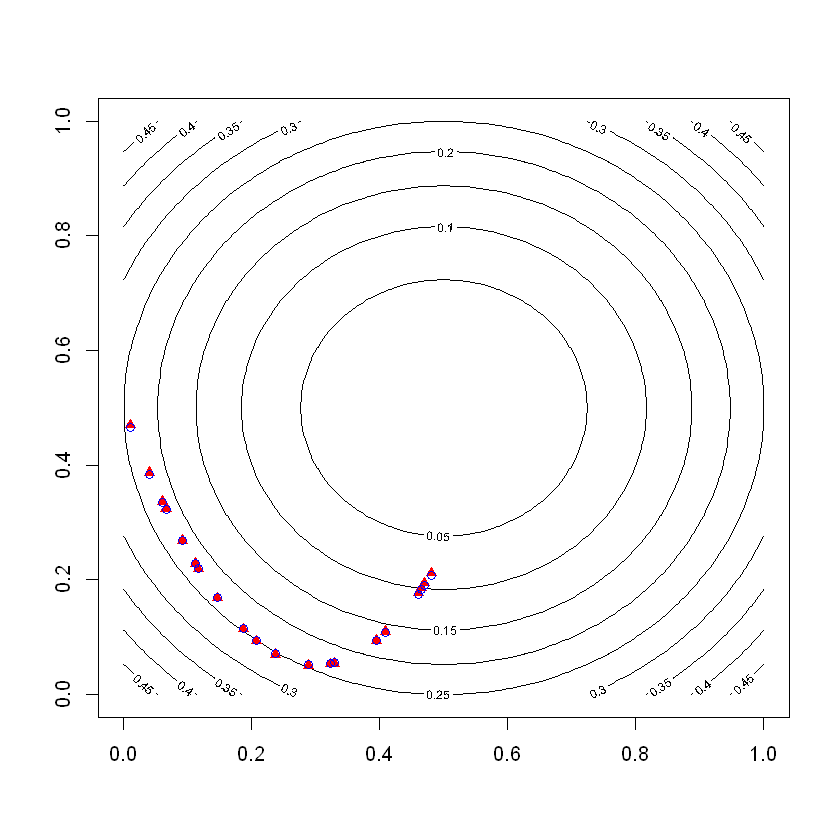

In [31]:
contour(x,sort(y),z)
points(mat.donne.test[,2], mat.donne.test[,1], col="red", pch = 17)  #points en rouges sont les vrais points pour la matrice de
#test que l'on est censé retrouver
points(mat.donne.test[,2],pred.gausspr.poly, col="blue")  #points en bleus sont les points prédits avec les processus gaussien



Parameter tuning of 'nnet':

- sampling method: 10-fold cross validation 

- best parameters:
 size decay
    5 0.001

- best performance: 0.0007849693 


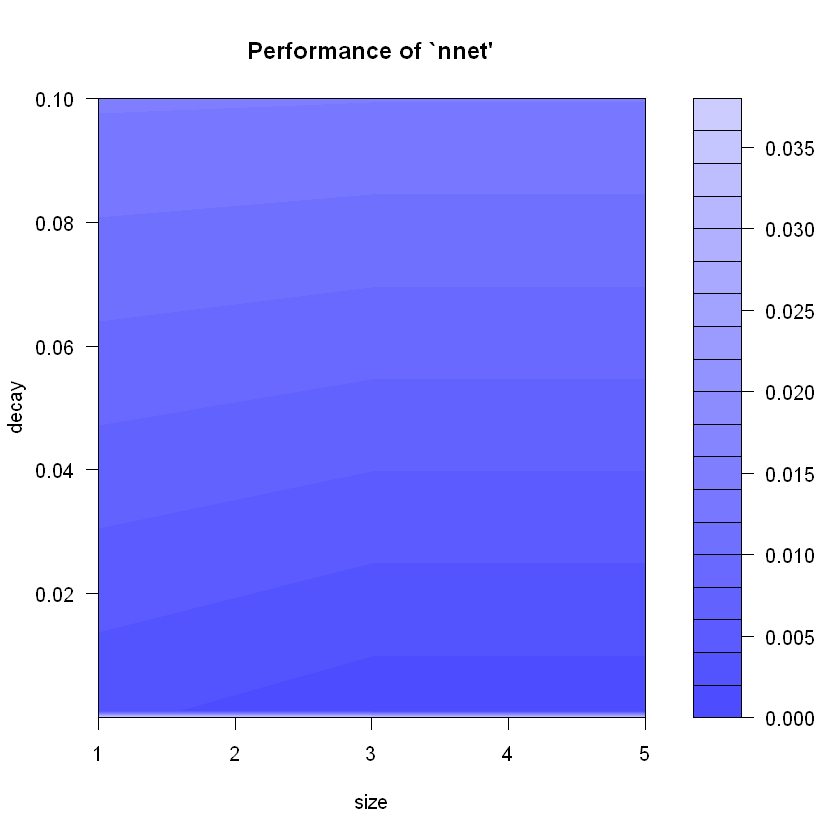

In [32]:
library("e1071")
tune.model = tune.nnet(resp~., data = mat.donne.appr, size = c (1, 3, 5),decay = c (0.1, 0.001, 0.000001))
plot(tune.model)
tune.model

In [33]:
nnet.reg.test=nnet(mat.donne.appr[,1]~.,data=mat.donne.appr,size=5, decay=0.001,maxit=500)
# calcul et graphe des résidus
nnet.reg.test

# weights:  26
initial  value 17.105612 
iter  10 value 3.310730
iter  20 value 3.303126
iter  30 value 3.285262
iter  40 value 3.135071
iter  50 value 0.475513
iter  60 value 0.104362
iter  70 value 0.081382
iter  80 value 0.078504
iter  90 value 0.077681
iter 100 value 0.077388
iter 110 value 0.077203
iter 120 value 0.076621
iter 130 value 0.075694
iter 140 value 0.075270
iter 150 value 0.074624
iter 160 value 0.074081
iter 170 value 0.073491
iter 180 value 0.072205
iter 190 value 0.071591
iter 200 value 0.071283
iter 210 value 0.071202
iter 220 value 0.071151
iter 230 value 0.071116
iter 240 value 0.071088
iter 250 value 0.071075
iter 260 value 0.071064
iter 270 value 0.071060
iter 280 value 0.071053
iter 290 value 0.071050
iter 300 value 0.071047
iter 310 value 0.071043
iter 320 value 0.071042
iter 330 value 0.071042
iter 340 value 0.071042
iter 350 value 0.071040
iter 360 value 0.071039
final  value 0.071039 
converged


a 3-5-1 network with 26 weights
inputs: resp x.donne y.donne 
output(s): mat.donne.appr[, 1] 
options were - decay=0.001

In [34]:
# Calcul des prévisions
pred.nnetr.test=predict(nnet.reg.test,newdata=mat.donne.test)
# Erreur quadratique moyenne de prévision
sum((pred.nnetr.test-mat.donne.test[,1])^2)/npop

# qd on grade vis au lieu de log vis on a l'erreur 9.98444881698066e+22

[1] 2.954738e-05

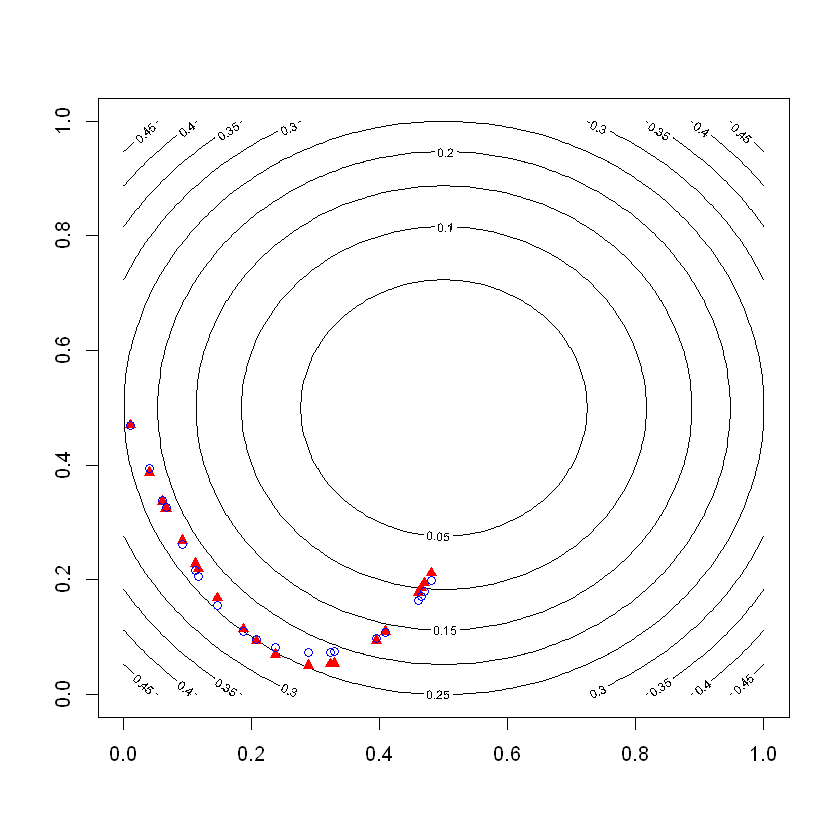

In [35]:
contour(x,sort(y),z)
points(mat.donne.test[,2], mat.donne.test[,1], col="red", pch = 17)  #points en rouges sont les vrais points pour la matrice de
#test que l'on est censé retrouver
points(mat.donne.test[,2],pred.nnetr.test, col="blue")  #points en bleus sont les points prédits avec les processus gaussien


In [ ]:
pred.nnetr.test